# Task
 Iris Flower Classification

 Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
 measurements. Now assume that you have the measurements of the iris flowers according to
 their species, and here your task is to train a machine learning model that can learn from the
 measurements of the iris species and classify them
 Although the Scikit-learn library provides a dataset for iris flower classification, you can also
 download the same dataset from here for the task of iris flower classification with Machine
 Learning.



## Data loading

### Subtask:
Load the Iris dataset from the "Iris.csv" file into a pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Iris.csv")
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data exploration

### Subtask:
Explore the Iris dataset to understand its structure, distributions, and relationships between features and the target variable.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Print the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Print the data types of each column
print("\nData types of each column:")
print(df.info())

# 3. Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
display(df.describe())

# 4. Distribution of the target variable 'Species'
print("\nDistribution of the target variable 'Species':")
print(df['Species'].value_counts())

Shape of the DataFrame: (150, 6)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistical summary of numerical features:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Distribution of the target variable 'Species':
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


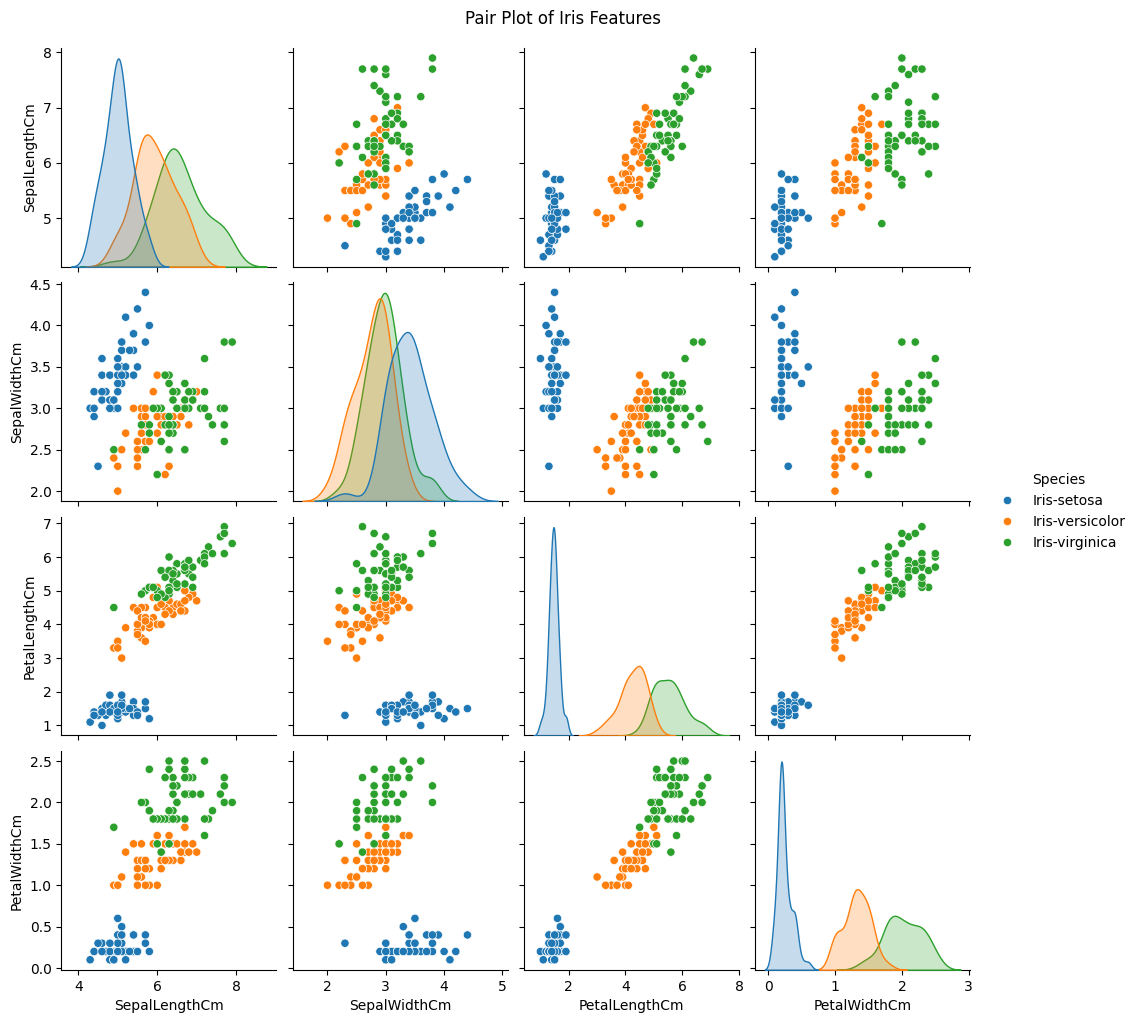

In [ ]:
# 5. Pair plot to visualize relationships between each pair of features
sns.pairplot(df.drop('Id', axis=1), hue='Species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

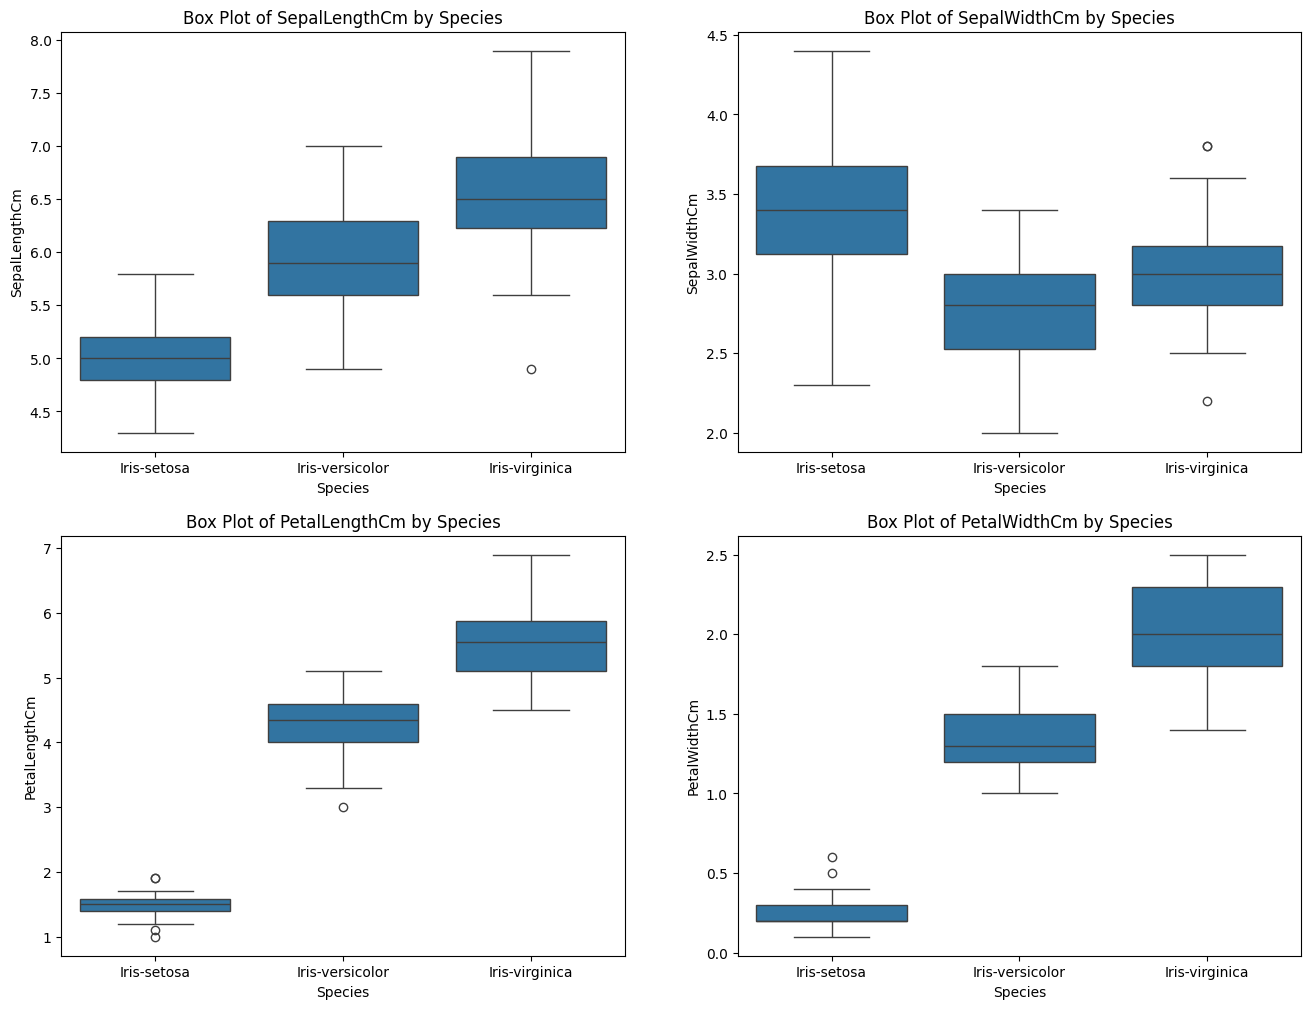

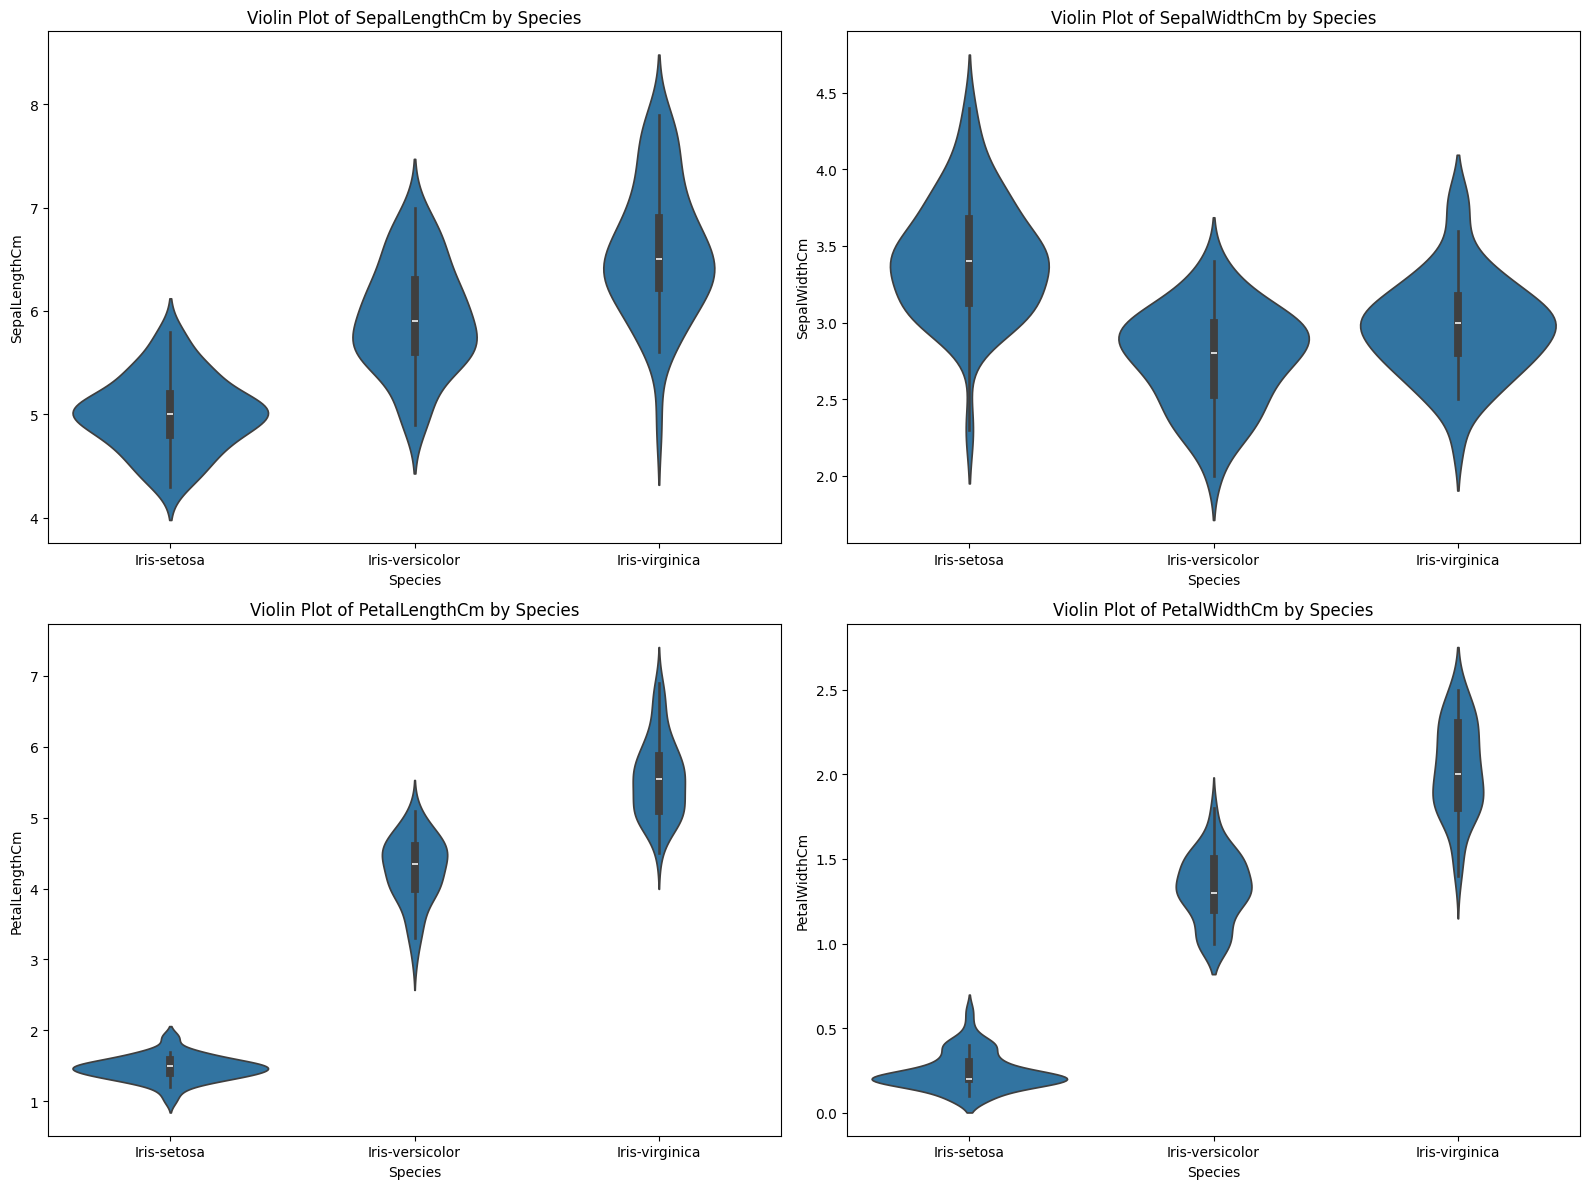

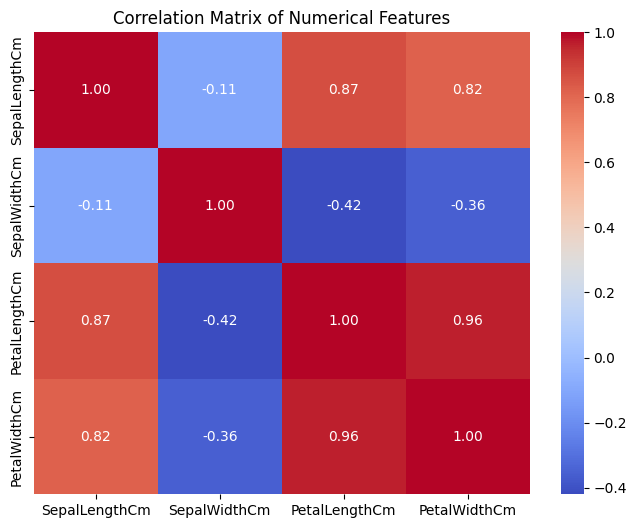

In [ ]:
# 6. Box plots and violin plots to investigate relationships between features and the target variable
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Species', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Species')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.violinplot(x='Species', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature} by Species')
plt.tight_layout()
plt.show()

# 7. Correlation matrix and heatmap
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the Iris dataset by checking for missing values, removing duplicate rows, and handling potential outliers.


Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate rows: 0
Shape of DataFrame after removing duplicates: (150, 6)


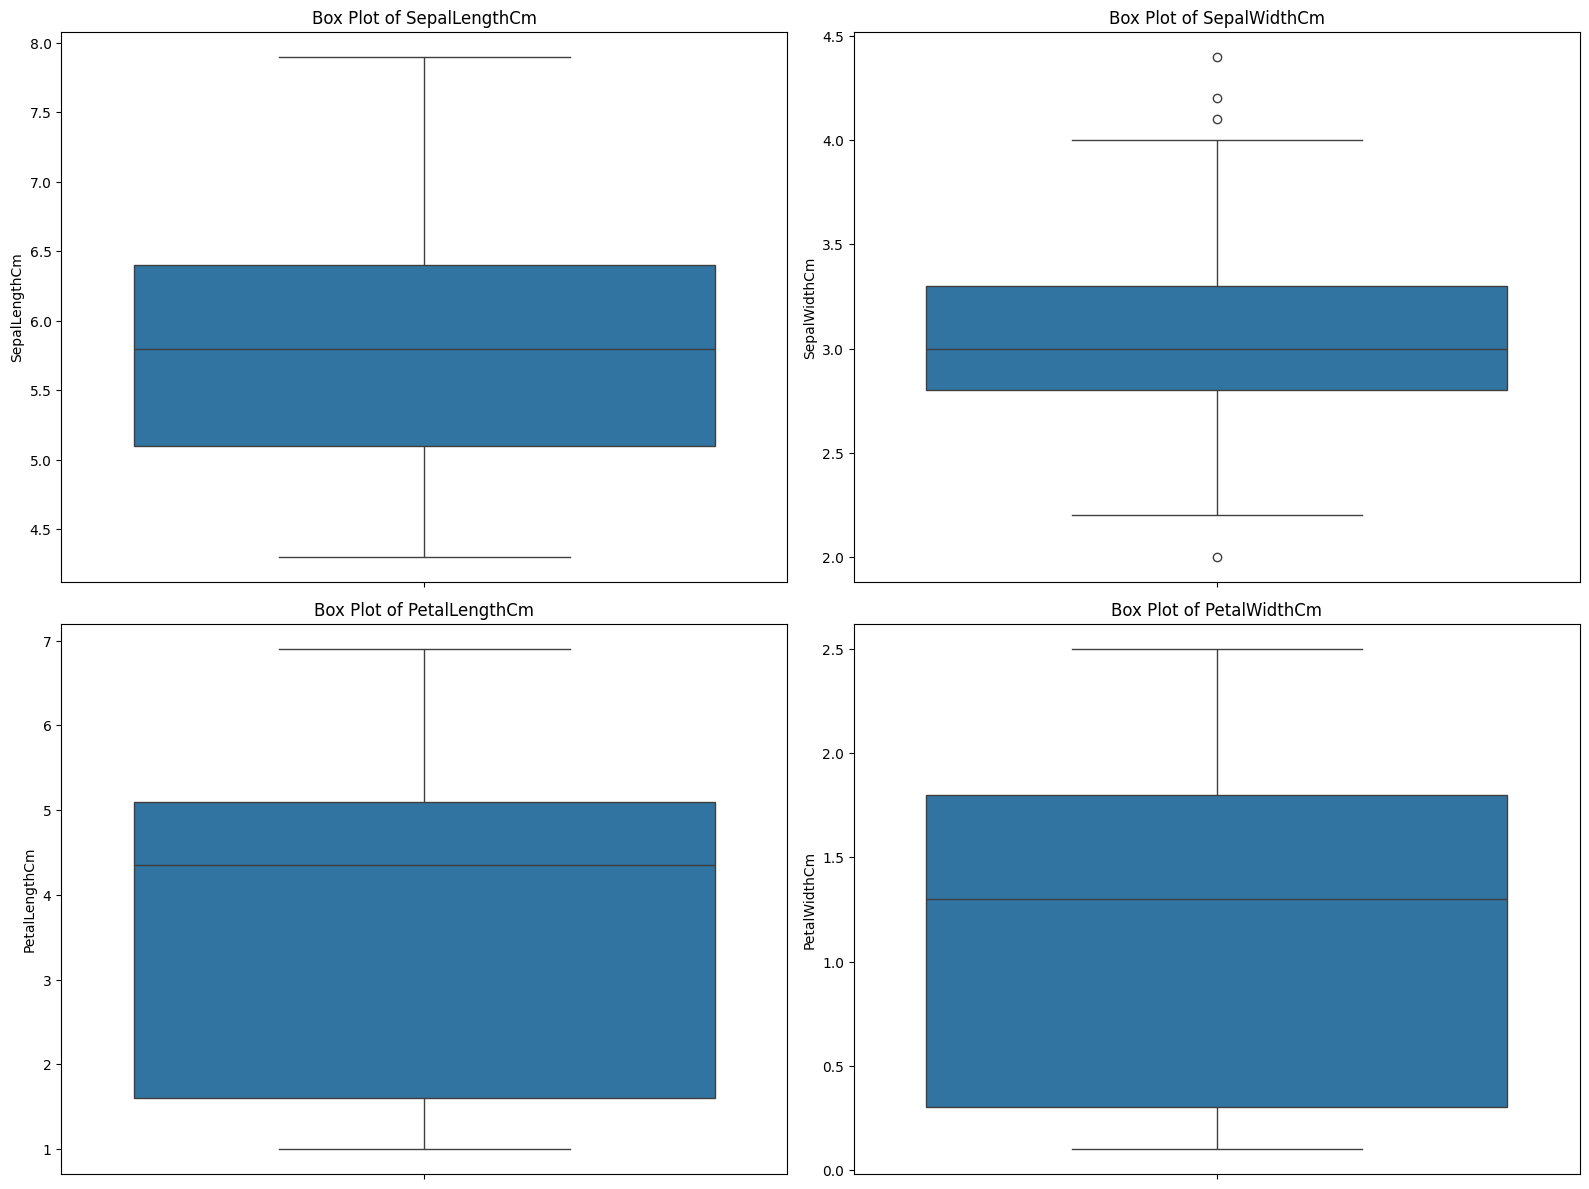


Shape of DataFrame after removing outliers: (146, 6)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Shape of DataFrame after removing duplicates:", df.shape)

# 4. Check for outliers
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# 5. Remove outliers
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

print("\nShape of DataFrame after removing outliers:", df.shape)

## Data wrangling

### Subtask:
Encode the categorical 'Species' column in the Iris dataset into numerical representations and drop the 'Id' column.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Drop the 'Id' column
df.drop('Id', axis=1, inplace=True)

# 2. Instantiate a LabelEncoder object
label_encoder = LabelEncoder()

# 3. Fit and transform the 'Species' column
df['Species'] = label_encoder.fit_transform(df['Species'])

# 4. Print the unique values in the 'Species' column
print("Unique values in the encoded 'Species' column:", df['Species'].unique())

Unique values in the encoded 'Species' column: [0 1 2]


## Data preparation

### Subtask:
Prepare the data for clustering by scaling the numerical features and performing dimensionality reduction using PCA.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Create a StandardScaler object
scaler = StandardScaler()

# 2. Fit and transform the numerical features
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_scaled = scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# 3. Create a PCA object with n_components=2
pca = PCA(n_components=2)

# 4. Fit and transform the scaled data
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# 5. Merge the 'Species' column
df_pca['Species'] = df['Species'].reset_index(drop=True)
display(df_pca.head())

,PCA1,PCA2,Species
0,-2.336739,0.660491,0
1,-2.145219,-0.611124,0
2,-2.432915,-0.218812,0
3,-2.366273,-0.495105,0
4,-2.463974,0.857315,0


## Data clustering

### Subtask:
Cluster the PCA-transformed data in `df_pca` using K-means clustering, and then visualize the clusters.


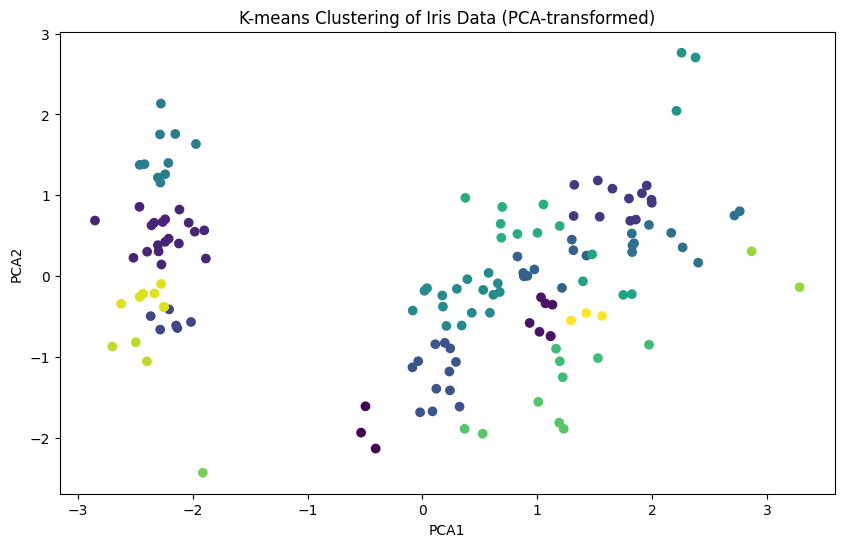

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Train a K-means model with 20 clusters on the PCA-transformed data
kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')
kmeans.fit(df_pca[['PCA1', 'PCA2']])

# 2. Add the cluster labels to the df_pca DataFrame
df_pca['cluster_label'] = kmeans.labels_

# 3. Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster_label'], cmap='viridis')

# 4. Add a title to the plot
plt.title('K-means Clustering of Iris Data (PCA-transformed)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 5. Show the plot
plt.show()

## Data splitting

### Subtask:
Split the original data in `df` into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the feature matrix X and target variable y
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (116, 4)
X_test shape: (30, 4)
y_train shape: (116,)
y_test shape: (30,)


## Feature engineering

### Subtask:
Create new features by combining existing features in the training dataset `X_train`.


In [ ]:
# 1. Create 'SepalArea'
X_train['SepalArea'] = X_train['SepalLengthCm'] * X_train['SepalWidthCm']

# 2. Create 'PetalArea'
X_train['PetalArea'] = X_train['PetalLengthCm'] * X_train['PetalWidthCm']

# 3. Create 'SepalPetalRatio'
X_train['SepalPetalRatio'] = X_train['SepalArea'] / X_train['PetalArea']

# 4. Check the shape of X_train
print("Shape of X_train after adding new features:", X_train.shape)

Shape of X_train after adding new features: (116, 7)


## Model training

### Subtask:
Train a Support Vector Machine (SVM) model on the training data (`X_train`, `y_train`).


In [ ]:
from sklearn.svm import SVC

# Instantiate an SVC object with default parameters
svm_model = SVC()

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

SVC()

## Model evaluation

### Subtask:
Evaluate the performance of the trained SVM model on the testing data (`X_test`, `y_test`).


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Make predictions on X_test
# Need to add engineered features for X_test first
X_test['SepalArea'] = X_test['SepalLengthCm'] * X_test['SepalWidthCm']
X_test['PetalArea'] = X_test['PetalLengthCm'] * X_test['PetalWidthCm']
X_test['SepalPetalRatio'] = X_test['SepalArea'] / X_test['PetalArea']

y_pred = svm_model.predict(X_test)

# 2. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 3. Generate classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

# 4. Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{matrix}")

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]


## Model optimization

### Subtask:
Optimize the SVM model by tuning its hyperparameters using GridSearchCV.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Instantiate an SVC object
svm = SVC()

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best Cross-validation Score:", grid_search.best_score_)

# Store the best estimator
best_svm_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score: 0.9826086956521738


## Summary:

### 1. Q&A

1.  **What is the accuracy of the initial SVM model on the test data?**
    *   The initial SVM model achieved an accuracy of 93.33% on the test data.
2.  **What were the best hyperparameters found for the SVM model during optimization?**
    *   The best hyperparameters found were `C=10`, `gamma='scale'`, and `kernel='rbf'`.
3.  **What was the best cross-validation score achieved with the optimized SVM model?**
    *   The best cross-validation score achieved was approximately 0.9826.
4. **How many data samples were removed as outliers?**
    * 4 rows were removed as outliers.
5. **How many clusters were used in the clustering?**
    * 20 clusters were used.
6. **How many species are there in the dataset?**
    * There are 3 species.
7. **How many columns does the X_train have before and after feature engineering?**
    * X_train has 4 columns initially and 7 columns after feature engineering.
8. **How many rows and columns does the cleaned dataset have?**
    * The cleaned dataset has 146 rows and 6 columns.

### 2. Data Analysis Key Findings

*   The dataset originally contained 150 rows and 6 columns, with no missing values or duplicates, each species with 50 samples.
*   Outliers were detected and removed from the dataset, reducing the number of rows to 146.
*   The target variable 'Species' was successfully encoded into numerical labels 0, 1, and 2, representing the three different species.
*   After data preparation and dimensionality reduction with PCA, K-means clustering was applied, resulting in 20 clusters.
*   The data was split into training and testing sets, with the training set (`X_train`) having a shape of (116, 4), and the testing set (`X_test`) having a shape of (30, 4).
*   Three new features ('SepalArea', 'PetalArea', 'SepalPetalRatio') were engineered and added to the training set, expanding its shape to (116, 7), and they were added to `X_test` before model evaluation.
*   An initial SVM model was trained and evaluated, achieving an accuracy of 93.33% on the test data.
*   The optimized SVM model, after using `GridSearchCV`, achieved a best cross-validation score of 0.9826, with the best hyperparameters being `C=10`, `gamma='scale'`, and `kernel='rbf'`.

### 3. Insights or Next Steps

*   The high accuracy (93.33%) of the initial SVM model and the further improvement after hyperparameter tuning (0.9826 cross-validation score) indicate that the SVM model is well-suited for this classification task.
*   Further experiments can be done by trying other classification algorithms and comparing their performance with the optimized SVM model.
